<a href="https://colab.research.google.com/github/FerdousJUST/ImageClassificationCoding-2023-/blob/main/ImageClassificationCode06(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os


In [2]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [4]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Image_Classification_Dataset/Training01',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Image_Classification_Dataset/Validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

val_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Image_Classification_Dataset/Validation New',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


valid_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Image_Classification_Dataset/valid_test_data',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [5]:

DATADIR='/content/drive/MyDrive/Image_Classification_Dataset/Training01'
CATEGORIES=['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']

IMG_SIZE=64

In [6]:
import cv2
import os

training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),
                                    # cv2.IMREAD_GRAYSCALE
                                     cv2.IMREAD_COLOR
                                     )
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [7]:

import random
random.shuffle(training_data)

In [8]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [9]:

X.shape

(4800, 64, 64, 3)

In [10]:
train_data_val = X/255

In [11]:

from sklearn.model_selection import train_test_split
(x_val,y_val)= train_test_split(train_data_val,test_size = 0.25)

In [12]:

x_val.shape

(3600, 64, 64, 3)

In [13]:

y_val.shape

(1200, 64, 64, 3)

In [14]:

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [15]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


cnn.add(tf.keras.layers.Flatten())


cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))

#cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))

In [16]:

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

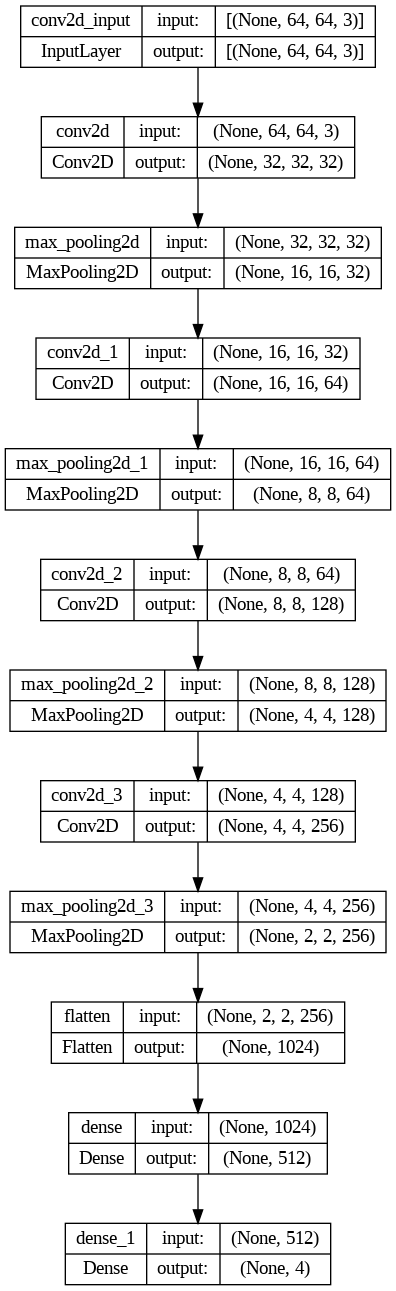

In [17]:

from tensorflow.keras.utils import plot_model
plot_model(model = cnn,show_shapes = True)

In [18]:


cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [19]:

r=cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
150/150 [==============================] - 888s 6s/step - loss: 1.1737 - accuracy: 0.5558 - val_loss: 1.2680 - val_accuracy: 0.4383
Epoch 2/50
150/150 [==============================] - 36s 239ms/step - loss: 1.0424 - accuracy: 0.6994 - val_loss: 1.1192 - val_accuracy: 0.6033
Epoch 3/50
150/150 [==============================] - 39s 263ms/step - loss: 0.9720 - accuracy: 0.7835 - val_loss: 1.0838 - val_accuracy: 0.6542
Epoch 4/50
150/150 [==============================] - 35s 231ms/step - loss: 0.9209 - accuracy: 0.8363 - val_loss: 0.9905 - val_accuracy: 0.7583
Epoch 5/50
150/150 [==============================] - 35s 232ms/step - loss: 0.9185 - accuracy: 0.8310 - val_loss: 0.9604 - val_accuracy: 0.7817
Epoch 6/50
150/150 [==============================] - 34s 228ms/step - loss: 0.8817 - accuracy: 0.8746 - val_loss: 0.8961 - val_accuracy: 0.8533
Epoch 7/50
150/150 [==============================] - 36s 239ms/step - loss: 0.8673 - accuracy: 0.8846 - val_loss: 0.9469 - val_accu

In [20]:

acc = cnn.evaluate(test_set,steps = len(test_set),verbose = 2)
print('%.2f'%(acc[1]*100))

38/38 - 6s - loss: 0.7824 - accuracy: 0.9683 - 6s/epoch - 164ms/step
96.83


<ipython-input-21-0db07aaef581>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  plt.plot(r.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
<ipython-input-21-0db07aaef581>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  plt.plot(r.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)


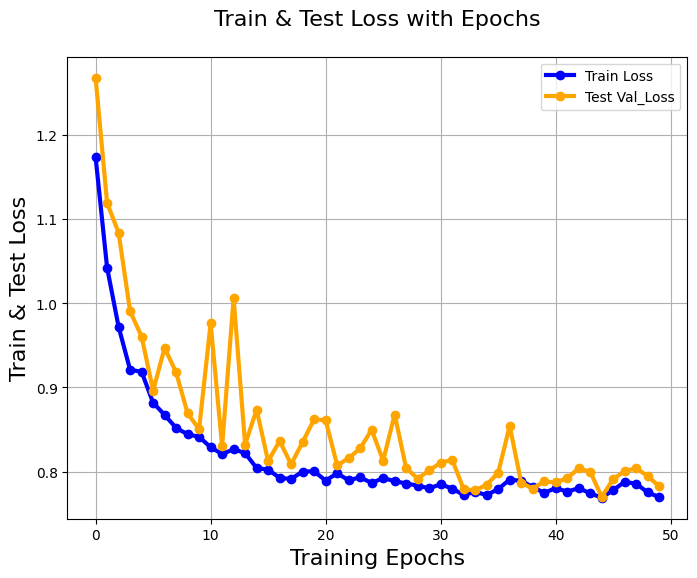

In [21]:

import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.plot(r.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(r.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,20)
plt.legend(['Train Loss', 'Test Val_Loss'], loc='upper right')
plt.title("Train & Test Loss with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Loss",fontsize =16)
plt.show()

<ipython-input-22-3a740e00a4a2>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  plt.plot(r.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
<ipython-input-22-3a740e00a4a2>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  plt.plot(r.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)


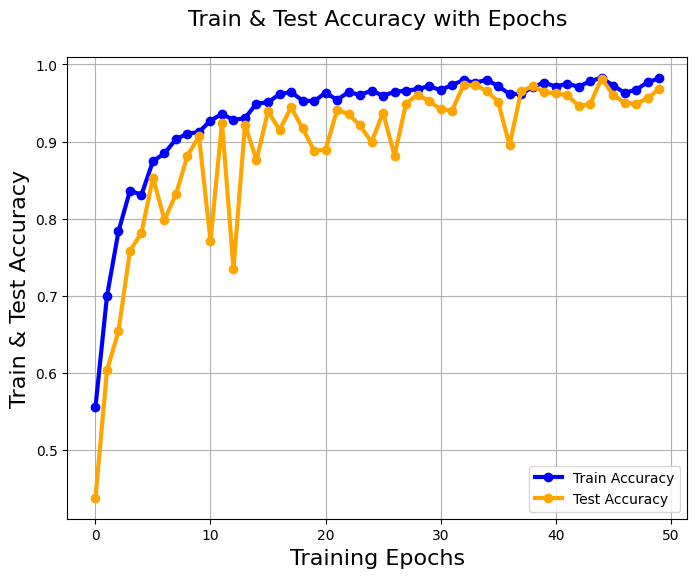

In [22]:

import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.plot(r.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(r.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.title("Train & Test Accuracy with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Accuracy",fontsize =16)
plt.show()

In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Image_Classification_Dataset/Training01/Hilsha_Fish/Hilsha_Fish 006.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

print(result)

list_index = [0,1,2,3]

x = result

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']

for i in range(4):
  print(classification[list_index[i]], ':', round(result[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 332ms/step
[[2.7767990e-06 9.9997866e-01 1.6478001e-05 2.1529613e-06]]
[1, 2, 0, 3]
Hilsha_Fish : 100.0 %
Spotted_Snakehead_Fish : 0.0 %
Barbel_Fish : 0.0 %
Tilapia_Fish : 0.0 %


In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Image_Classification_Dataset/Training01/Barbel_Fish/Barbel_Fish 406.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

print(result)

list_index = [0,1,2,3]

x = result

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']

for i in range(4):
  print(classification[list_index[i]], ':', round(result[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 28ms/step
[[0.99173146 0.00266278 0.00417144 0.0014344 ]]
[0, 2, 1, 3]
Barbel_Fish : 99.17 %
Spotted_Snakehead_Fish : 0.42 %
Hilsha_Fish : 0.27 %
Tilapia_Fish : 0.14 %


In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Image_Classification_Dataset/Training01/Spotted_Snakehead_Fish/Spotted_Fish 013.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

print(result)

list_index = [0,1,2,3]

x = result

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']

for i in range(4):
  print(classification[list_index[i]], ':', round(result[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 19ms/step
[[4.2450648e-26 1.7833394e-22 1.0000000e+00 8.8212351e-23]]
[2, 1, 3, 0]
Spotted_Snakehead_Fish : 100.0 %
Hilsha_Fish : 0.0 %
Tilapia_Fish : 0.0 %
Barbel_Fish : 0.0 %


In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Image_Classification_Dataset/Training01/Tilapia_Fish/Tilapia_Fish 028.png', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

print(result)

list_index = [0,1,2,3]

x = result

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']

for i in range(4):
  print(classification[list_index[i]], ':', round(result[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 18ms/step
[[3.6838060e-10 3.7035996e-08 3.5221492e-06 9.9999642e-01]]
[3, 2, 1, 0]
Tilapia_Fish : 100.0 %
Spotted_Snakehead_Fish : 0.0 %
Hilsha_Fish : 0.0 %
Barbel_Fish : 0.0 %


In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score


In [28]:

y_pred = cnn.predict(val_set)

38/38 [==============================] - 751s 20s/step


In [29]:
y_pred = np.argmax(y_pred,axis = 1)

In [30]:

y_pred.shape

(1200,)

In [31]:

x_pred = cnn.predict(valid_set)

38/38 [==============================] - 739s 20s/step


In [32]:
x_pred = np.argmax(x_pred,axis = 1)

In [33]:
x_pred.shape

(1200,)

In [34]:

print(classification_report(x_pred,y_pred))

              precision    recall  f1-score   support

           0       0.31      0.30      0.31       322
           1       0.28      0.28      0.28       312
           2       0.27      0.29      0.28       265
           3       0.29      0.28      0.28       301

    accuracy                           0.29      1200
   macro avg       0.29      0.29      0.29      1200
weighted avg       0.29      0.29      0.29      1200



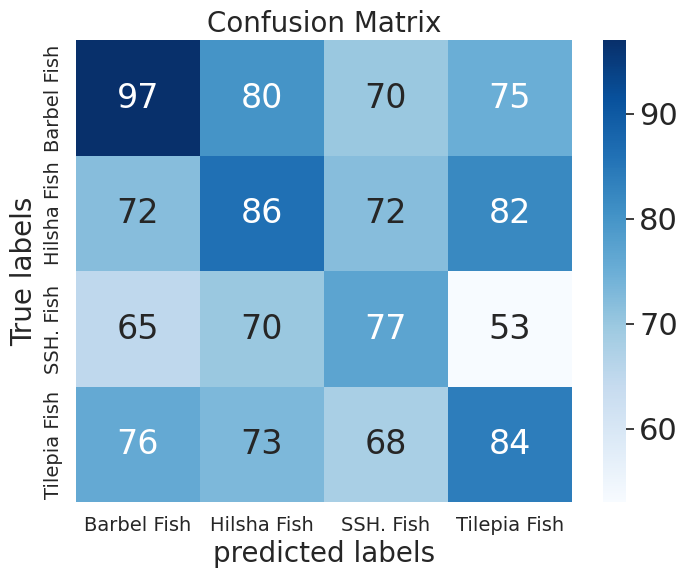

In [38]:
import seaborn as sns
cm = confusion_matrix(x_pred,y_pred)

plt.figure(figsize=(8,6))
ax = plt.subplot()
sns.set(font_scale = 2.0)
sns.heatmap(cm,annot = True,fmt ='g',cmap = "Blues",ax=ax);

ax.set_xlabel('predicted labels',fontsize = 20);
ax.set_ylabel('True labels',fontsize = 20);
ax.set_title('Confusion Matrix',fontsize = 20);
ax.xaxis.set_ticklabels(['Barbel Fish','Hilsha Fish','SSH. Fish','Tilepia Fish'],fontsize = 14);
ax.yaxis.set_ticklabels(['Barbel Fish','Hilsha Fish','SSH. Fish','Tilepia Fish'],fontsize = 14);

In [39]:

f1_score(x_pred,y_pred,average = 'macro')

0.28631827463450377

In [40]:
recall_score(x_pred,y_pred,average = 'weighted')

0.2866666666666667

In [41]:

precision_score(x_pred,y_pred,average = 'macro')

0.28630683663778167